In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [208]:
data = pd.read_csv('../raw_data/final_dataset.csv')

/tmp/ipykernel_7169/2571238746.py:1: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../raw_data/final_dataset.csv')


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585758 entries, 0 to 585757
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         585758 non-null  int64  
 1   track_id           585758 non-null  object 
 2   track_name         585758 non-null  object 
 3   track_popularity   585758 non-null  int64  
 4   release_date       585758 non-null  object 
 5   duration_ms        585758 non-null  int64  
 6   artists            585758 non-null  object 
 7   id_artists         585758 non-null  object 
 8   artist_popularity  574027 non-null  float64
 9   followers          574026 non-null  float64
 10  genres             527417 non-null  object 
 11  danceability       585758 non-null  float64
 12  energy             585758 non-null  float64
 13  key                585758 non-null  int64  
 14  loudness           585758 non-null  float64
 15  mode               585758 non-null  int64  
 16  sp

In [241]:
data.head()

,Unnamed: 0,track_id,track_name,track_popularity,release_date,duration_ms,artists,id_artists,artist_popularity,followers,...,valence,tempo,explicit,preview_url,cover_album,delta_days,loudness_norm,tempo_norm,followers_norm,duration_norm
0,0,35iwgR4jXetI318WEWsa1Q,Carve,0.06,1922-02-22,126903,Uli,45tIt06XoI0Iio4LBEVpls,0.04,91.0,...,0.1270,104.851,0.0,NaN,NaN,36924,0.410984,0.365673,0.195904,0.705095
1,2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0.00,1922-03-21,181640,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,0.23,3528.0,...,0.4570,130.418,0.0,NaN,NaN,36897,0.243655,0.536120,0.354753,0.756324
2,3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0.00,1922-03-21,176907,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,0.23,3528.0,...,0.3970,169.980,0.0,NaN,NaN,36897,0.155041,0.799867,0.354753,0.752553
3,4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0.00,1922-01-01,163080,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,0.35,11327.0,...,0.1960,103.220,0.0,NaN,NaN,36976,0.324112,0.354800,0.405411,0.740927
4,5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0.00,1922-01-01,178933,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,0.35,11327.0,...,0.0539,118.891,0.0,NaN,NaN,36976,0.439171,0.459273,0.405411,0.754179


In [211]:
data['release_date'] = pd.to_datetime(data['release_date'], format = '%Y-%m-%d') #.dt.date

In [212]:
data['release_date']

0        1922-02-22
1        1922-03-21
2        1922-03-21
3        1922-01-01
4        1922-01-01
            ...    
585753   2022-07-19
585754   2022-08-26
585755   2022-07-01
585756   2022-05-06
585757   2022-06-03
Name: release_date, Length: 585758, dtype: datetime64[ns]

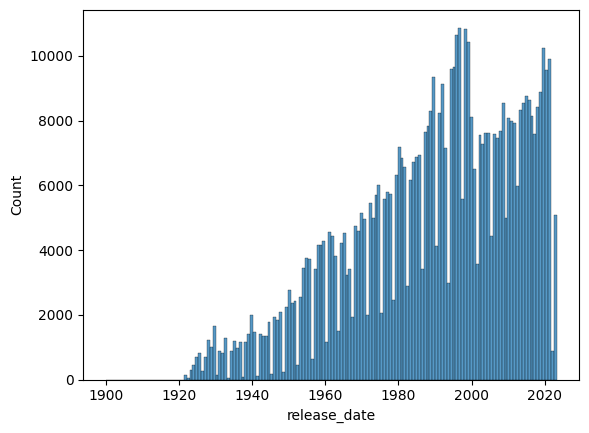

In [213]:
sns.histplot(data['release_date'])
plt.show()

In [214]:
data['delta_days'] = pd.Timestamp.today() - data['release_date']
data['delta_days'] = data['delta_days'].apply(lambda x: x.days)
data['delta_days']

0         36924
1         36897
2         36897
3         36976
4         36976
          ...  
585753      252
585754      214
585755      270
585756      326
585757      298
Name: delta_days, Length: 585758, dtype: int64

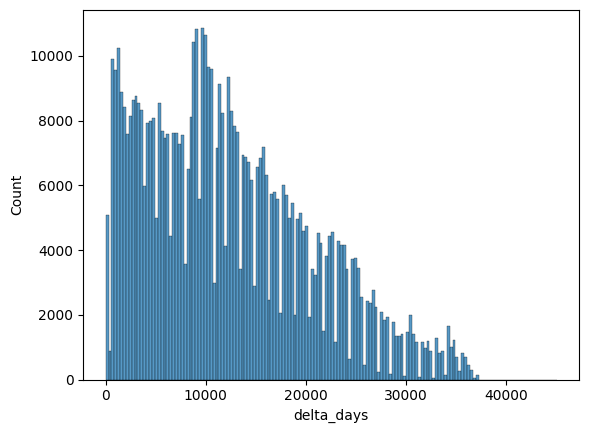

In [215]:
sns.histplot(data['delta_days'])
plt.show()

/tmp/ipykernel_7169/3042985305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loudness'][data['loudness'] > 0] = 0


<Axes: >

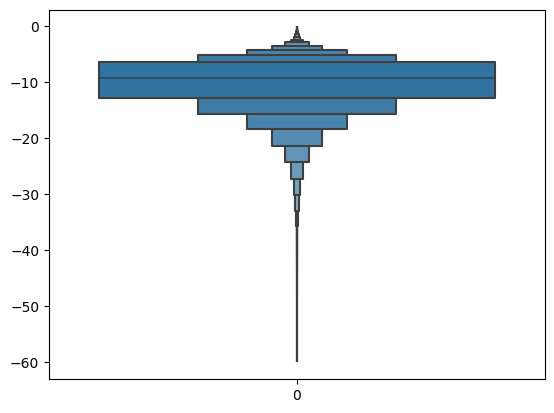

In [216]:
data['loudness'][data['loudness'] > 0] = 0
sns.boxenplot(data['loudness'])

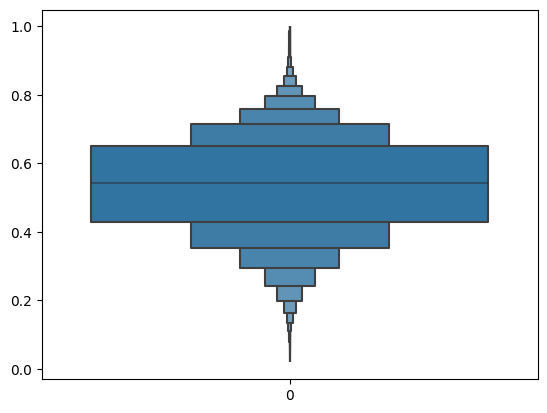

In [217]:
# Normalize the loudness to a balanced distribution
data['loudness_norm'] = np.exp(1 + data['loudness']/15)/np.e
sns.boxenplot(data['loudness_norm'])
plt.show()

/tmp/ipykernel_7169/3697978375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tempo'][data['tempo'] > 200] = 200
/tmp/ipykernel_7169/3697978375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tempo'][data['tempo'] < 50] = 50


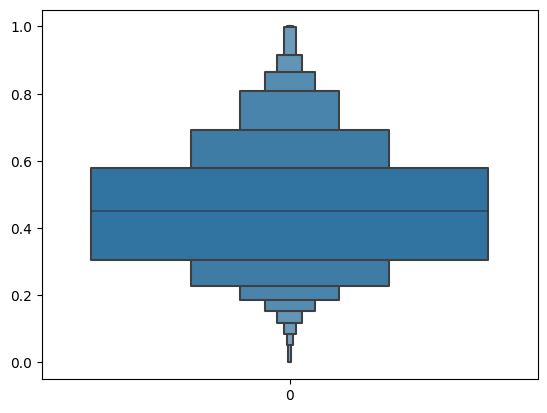

In [218]:
# normalize tempo
# 0 slowest - 1 fastest
data['tempo'][data['tempo'] > 200] = 200
data['tempo'][data['tempo'] < 50] = 50
data['tempo_norm'] = (data['tempo'] - 50)/150
sns.boxenplot(data['tempo_norm'])
plt.show()

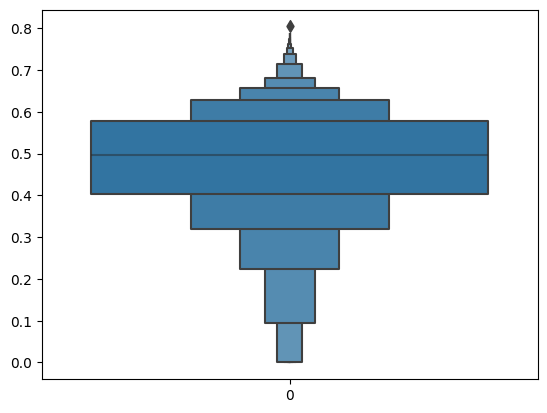

In [242]:
#normalize followers
data['followers'] = data['followers'].fillna(0)
data['followers_norm'] = np.log10(data['followers']+1)/10
sns.boxenplot(data['followers_norm'])
plt.show()

/tmp/ipykernel_7169/395983464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration_ms'][data['duration_ms']>1000000] = 1000000


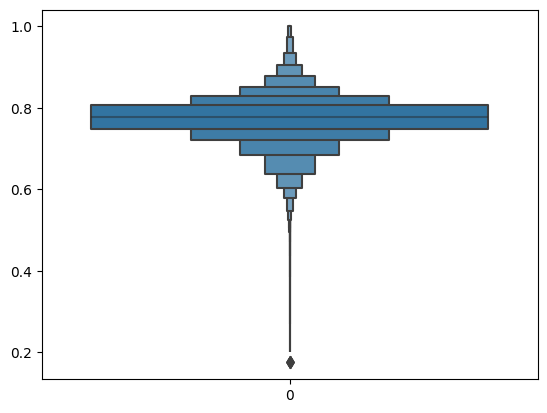

In [222]:
#normalize duration
data['duration_ms'][data['duration_ms']>1000000] = 1000000
data['duration_norm'] = np.log10(data['duration_ms']/1000000)/3+1
sns.boxenplot(data['duration_norm'])
plt.show()


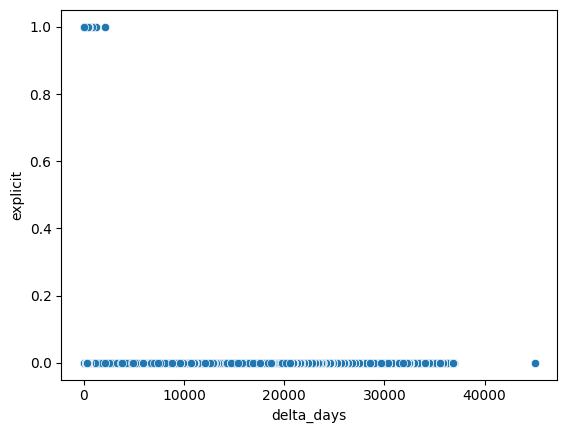

In [223]:
data['explicit'] = data['explicit'].fillna(0)
sns.scatterplot(x= data['delta_days'], y=data['explicit'])
plt.show()

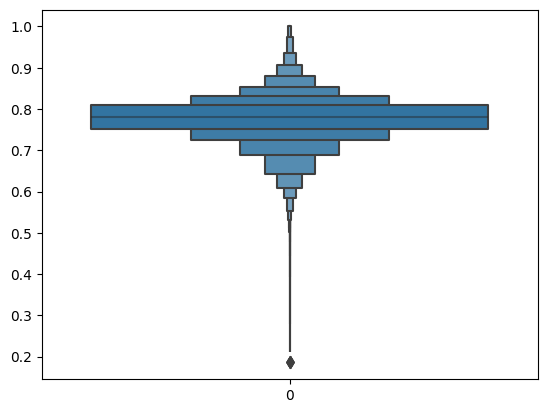

(3344, 1000000)

In [224]:
#normalize duration
data['duration_norm'] = 1+np.log(data['duration_ms']/1000000)/7
sns.boxenplot(data['duration_norm'])
plt.show()
min(data['duration_ms']), max(data['duration_ms'])

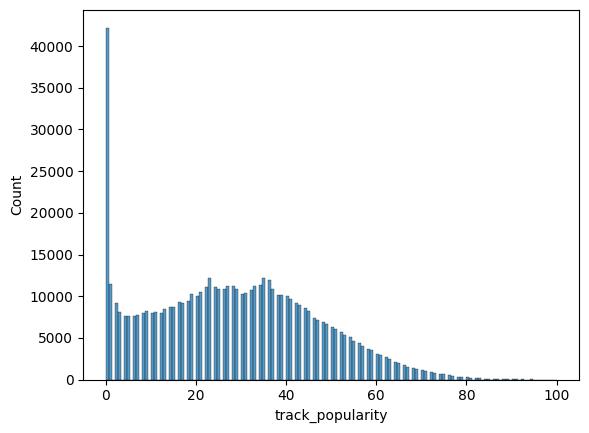

In [225]:
sns.histplot(data['track_popularity'])
plt.show()

In [226]:
#normalize popularity scores from 0-100 to 0-1
data['track_popularity'] = data['track_popularity']/100
data['artist_popularity'] = data['artist_popularity']/100

In [244]:
new_data_numeric = data.select_dtypes(exclude=['object', 'datetime64[ns]'])
new_data_numeric = new_data_numeric.drop(columns=['Unnamed: 0', 'explicit', 'key', 
                                                  'mode', 'loudness', 'tempo', 'followers', 'duration_ms'])
new_data_numeric.dtypes

track_popularity     float64
artist_popularity    float64
danceability         float64
energy               float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
delta_days             int64
loudness_norm        float64
tempo_norm           float64
followers_norm       float64
duration_norm        float64
dtype: object

In [245]:
new_data_numeric = new_data_numeric.fillna(0)
new_data_numeric.shape

(585758, 14)

In [246]:
new_data_numeric.describe()

,track_popularity,artist_popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,delta_days,loudness_norm,tempo_norm,followers_norm,duration_norm
count,585758.000000,585758.000000,585758.000000,585758.000000,585758.000000,585758.00000,585758.000000,585758.000000,585758.000000,585758.000000,585758.000000,585758.000000,585758.000000,585758.000000
mean,0.279505,0.498098,0.562637,0.546837,0.094891,0.44586,0.114727,0.212848,0.551717,12286.896573,0.536747,0.457953,0.474963,0.777742
std,0.184199,0.208661,0.166520,0.250441,0.155194,0.34927,0.268117,0.184043,0.258398,8309.633783,0.152646,0.196671,0.147681,0.058464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,0.018316,0.000000,0.000000,0.185630
25%,0.130000,0.370000,0.452000,0.354000,0.033900,0.09320,0.000000,0.097900,0.344000,5482.000000,0.428899,0.306127,0.404072,0.751818
50%,0.270000,0.520000,0.575000,0.555000,0.044000,0.41300,0.000027,0.137000,0.563000,11012.000000,0.543822,0.451840,0.496409,0.780553
75%,0.410000,0.650000,0.685000,0.751000,0.074300,0.78200,0.010300,0.276000,0.770000,17618.000000,0.651290,0.577520,0.578750,0.809699
max,1.000000,1.000000,0.991000,1.000000,0.970000,0.99600,1.000000,1.000000,1.000000,45011.000000,1.000000,1.000000,0.804379,1.000000


In [231]:
corr = new_data_numeric.corr()
corr['track_popularity'][np.absolute(corr['track_popularity'])>0.00].sort_values(ascending = False)

track_popularity     1.000000
artist_popularity    0.517514
followers_norm       0.458247
loudness_norm        0.338219
energy               0.293368
danceability         0.198929
duration_norm        0.103222
tempo_norm           0.068312
speechiness          0.004458
valence              0.002055
liveness            -0.048392
instrumentalness    -0.241218
acousticness        -0.369723
delta_days          -0.585264
Name: track_popularity, dtype: float64

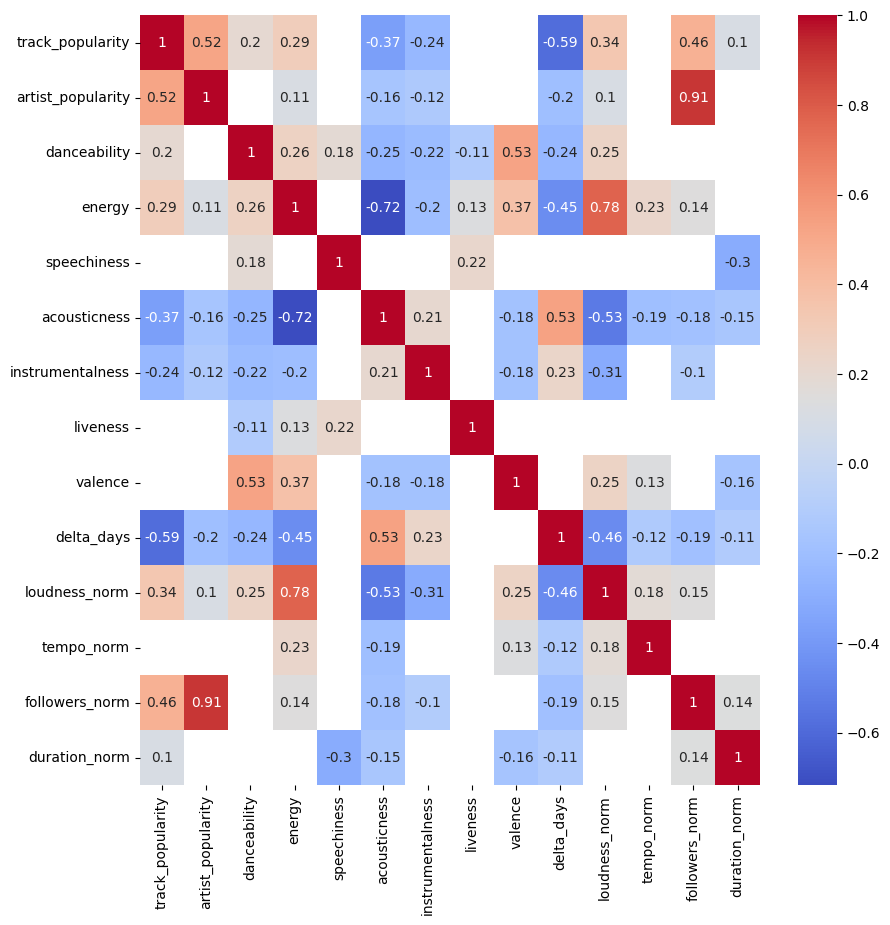

In [232]:
fig, ax = plt.subplots(figsize= (10,10))
sns.heatmap(corr[np.absolute(corr)>0.1], annot = True, cmap='coolwarm')
plt.show()

In [233]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [247]:
X = new_data_numeric.drop(['track_popularity'], axis = 1)
y = new_data_numeric['track_popularity']

In [248]:
lin_reg = LinearRegression().fit(X, y)
lin_reg.score(X, y)

0.5317256270597865

In [253]:
xgb_reg = XGBRegressor()
parameters = {
    'random_state': [0],
    'reg_alpha': [0],
    'reg_lambda': [1],
    'gamma': [0], #default: 0
    'n_estimators': [250, 500],
    'learning_rate': [0.05, 0.1], #default: 0.3
    'colsample_bytree': [0.6], #default: 1
    'subsample': [1], #default: 1
    'max_depth': [10], #default: 6
    'min_child_weight': [2, 4], #default: 1
    'eval_metric': ['rmsle']
    }

### optional to enable CUDA accelerated training
#import torch
#if torch.cuda.device_count() > 0:
#   parameters['tree_method'] = ['gpu_hist']
#   print('CUDA-GPU accelerated tra

In [254]:
clf = GridSearchCV(xgb_reg, parameters, n_jobs=-1)
clf.fit(X, y)
clf.best_params_, clf.best_score_

({'colsample_bytree': 0.6,
  'eval_metric': 'rmsle',
  'gamma': 0,
  'learning_rate': 0.05,
  'max_depth': 10,
  'min_child_weight': 2,
  'n_estimators': 250,
  'random_state': 0,
  'reg_alpha': 0,
  'reg_lambda': 1,
  'subsample': 1},
 0.5731348263336424)

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [252]:
# initialize new XGBRegressor with best parameters from grid search on small dataset
xgb_reg = clf.best_estimator_

# fit on the full dataset
xgb_reg.fit(X_train, y_train, verbose=False)

# Predict against the test set
xgb_pred = xgb_reg.predict(X_test)
    
# Score    
rmse_xgb = mean_squared_error(y_test, xgb_pred, squared=False)
print("Root Mean Squared Error for XGBoost Regressor:", round(rmse_xgb, 3))
r2_xgb = r2_score(y_test, xgb_pred)
print("R2 Score for XGBoost Regressor:", round(r2_xgb, 3))

Root Mean Squared Error for XGBoost Regressor: 0.098
R2 Score for XGBoost Regressor: 0.718


In [255]:
#Save the model
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(xgb_reg, open(file_name, "wb"))